<a href="https://www.kaggle.com/code/suryanshmehrotra/book-crossing-pyspark-analysis?scriptVersionId=142523354" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode, split, lower, desc, count, avg

spark = SparkSession.builder \
    .appName("MyApp") \
    .getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285413 sha256=7207f0922c2d6be23bb40b25e711123f4632335f800f6334b32167593a38876b
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/10 10:55:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.csv('/kaggle/input/bookcrossing-dataset/Books.csv', header=True, inferSchema=True, sep=';')
df.show()

+----------+--------------------+--------------------+----+--------------------+
|      ISBN|               Title|              Author|Year|           Publisher|
+----------+--------------------+--------------------+----+--------------------+
|0195153448| Classical Mythology|  Mark P. O. Morford|2002|Oxford University...|
|0002005018|        Clara Callan|Richard Bruce Wright|2001|HarperFlamingo Ca...|
|0060973129|Decision in Normandy|        Carlo D'Este|1991|     HarperPerennial|
|0374157065|Flu: The Story of...|    Gina Bari Kolata|1999|Farrar Straus Giroux|
|0393045218|The Mummies of Ur...|     E. J. W. Barber|1999|W. W. Norton & Co...|
|0399135782|The Kitchen God's...|             Amy Tan|1991|    Putnam Pub Group|
|0425176428|What If?: The Wor...|       Robert Cowley|2000|Berkley Publishin...|
|0671870432|     PLEADING GUILTY|         Scott Turow|1993|          Audioworks|
|0679425608|Under the Black F...|     David Cordingly|1996|        Random House|
|074322678X|Where You'll Fin

In [3]:
df2 = spark.read.csv('/kaggle/input/bookcrossing-dataset/Ratings.csv', header=True, inferSchema=True, sep=';')
df2.show()

+-------+----------+------+
|User-ID|      ISBN|Rating|
+-------+----------+------+
| 276725|034545104X|     0|
| 276726|0155061224|     5|
| 276727|0446520802|     0|
| 276729|052165615X|     3|
| 276729|0521795028|     6|
| 276733|2080674722|     0|
| 276736|3257224281|     8|
| 276737|0600570967|     6|
| 276744|038550120X|     7|
| 276745| 342310538|    10|
| 276746|0425115801|     0|
| 276746|0449006522|     0|
| 276746|0553561618|     0|
| 276746|055356451X|     0|
| 276746|0786013990|     0|
| 276746|0786014512|     0|
| 276747|0060517794|     9|
| 276747|0451192001|     0|
| 276747|0609801279|     0|
| 276747|0671537458|     9|
+-------+----------+------+
only showing top 20 rows



In [4]:
df3 = df2

In [5]:
#Select specific columns and show the first 10 rows
df.select(col("Title"), col("Author")).show(10)

+--------------------+--------------------+
|               Title|              Author|
+--------------------+--------------------+
| Classical Mythology|  Mark P. O. Morford|
|        Clara Callan|Richard Bruce Wright|
|Decision in Normandy|        Carlo D'Este|
|Flu: The Story of...|    Gina Bari Kolata|
|The Mummies of Ur...|     E. J. W. Barber|
|The Kitchen God's...|             Amy Tan|
|What If?: The Wor...|       Robert Cowley|
|     PLEADING GUILTY|         Scott Turow|
|Under the Black F...|     David Cordingly|
|Where You'll Find...|         Ann Beattie|
+--------------------+--------------------+
only showing top 10 rows



In [6]:
# Filter books that were published after 2000
df.filter(col("Year") > 2000).show()

+----------+--------------------+--------------------+----+--------------------+
|      ISBN|               Title|              Author|Year|           Publisher|
+----------+--------------------+--------------------+----+--------------------+
|0195153448| Classical Mythology|  Mark P. O. Morford|2002|Oxford University...|
|0002005018|        Clara Callan|Richard Bruce Wright|2001|HarperFlamingo Ca...|
|074322678X|Where You'll Find...|         Ann Beattie|2002|            Scribner|
|0887841740|  The Middle Stories|         Sheila Heti|2004|House of Anansi P...|
|1841721522|New Vegetarian: B...|  Celia Brooks Brown|2001|Ryland Peters & S...|
|1879384493|If I'd Known Then...|       J. R. Parrish|2003|       Cypress House|
|0971880107|         Wild Animus|        Rich Shapero|2004|             Too Far|
|0375759778|    Prague : A Novel|     ARTHUR PHILLIPS|2003|Random House Trad...|
|3404921038|Wie Barney es sieht.|    Mordecai Richler|2002|            LÃ?Â¼bbe|
|3442353866|Der Fluch der Ka

In [7]:
# Count the number of books by author
author_book_count = df.groupBy("Author").agg(count("*").alias("BookCount"))

# Filter out authors with only one book
filtered_author_book_count = author_book_count.filter("BookCount > 1")

# Show the results
filtered_author_book_count.show()

+--------------------+---------+
|              Author|BookCount|
+--------------------+---------+
|         Ann Beattie|       24|
|     Karen Armstrong|       14|
|    Patrick Robinson|       19|
|         Ann Rinaldi|       34|
|             Anonimo|       18|
|      Madeline Baker|       50|
|         Alan Garner|       18|
|          Dava Sobel|       13|
|   Sharon Kay Penman|       17|
|       Cathy Maxwell|       18|
|    Amanda Eyre Ward|        2|
|        Mick Middles|        2|
|Arthur Conan, Sir...|       61|
|Susan Campbell Ba...|        2|
|     R. A. Salvatore|       58|
|       Roger Housden|        5|
|     Victor Kelleher|        8|
|    L. M. Montgomery|       30|
|     Mario Benedetti|       24|
|              Grimes|        5|
+--------------------+---------+
only showing top 20 rows



In [8]:
#Find the most popular publisher by counting the number of books they published
df.groupBy(col("Publisher")).agg(count("*").alias("Books")).orderBy(desc("Books")).show(1)

+---------+-----+
|Publisher|Books|
+---------+-----+
|Harlequin| 7536|
+---------+-----+
only showing top 1 row



In [9]:
#Calculate the average publication year of books:
df.select(avg(col("Year"))).show()

+------------------+
|         avg(Year)|
+------------------+
|1959.7544497099857|
+------------------+



In [10]:
# Sort books by publication year in descending order
df.sort(col("Year").desc()).show()

+----------+--------------------+--------------------+--------------------+--------------------+
|      ISBN|               Title|              Author|                Year|           Publisher|
+----------+--------------------+--------------------+--------------------+--------------------+
|0330482750|"Three Novels: ""...| \""Afternoon Raa...| \""Freedom Song\"""|      Amit Chaudhuri|
|8423920143|"GuÃ­a del lector...|       14 : Ensayo)"|Salvador de Madar...|                1976|
|085409878X|    """Pie-powder\""| being dust from ...| John Alderson Foote|                1973|
|0553570722|"""R\"" for Reven...| Created by Franc...|     Francine Pascal|                1997|
|0807735132|"""The Having of ...|           Learning"|   Eleanor Duckworth|                1996|
|006263545X|"Ludwig van Beeth...| The \""Egmont\""...|           Alan Rich|                1995|
|0140201092|Outline of Europe...|    Nikolaus Pevsner|                2050|         Penguin USA|
|0140301690|Alice's Adventure.

In [11]:
# Split the Title column and explode the resulting array
words_df = df.select(explode(split(col("Title"), " ")).alias("Word"))

# Convert the words to lowercase and group by count
word_count_df = words_df.select(lower(col("Word")).alias("Word")) \
                       .groupBy("Word") \
                       .agg(count("*").alias("Count")) \
                       .orderBy(desc("Count"))

# Show the top 10 words
word_count_df.show(10)

+----+------+
|Word| Count|
+----+------+
| the|115784|
|  of| 63251|
|   a| 39741|
| and| 35309|
|  to| 21619|
|  in| 19255|
|   :| 13368|
| for| 13304|
|  no| 10113|
|book|  8726|
+----+------+
only showing top 10 rows



In [12]:
# convert DataFrame to RDD and apply mapPartitions()
rdd = df.rdd.mapPartitions(lambda partition: map(lambda row: (row[2], 1), partition))

# apply reduceByKey() to get count of books per author
rdd_count = rdd.reduceByKey(lambda x, y: x + y)

# filter out authors with only one book
rdd_filtered = rdd_count.filter(lambda x: x[1] > 1)

# convert back to DataFrame and show results
df_filtered = rdd_filtered.toDF(["Author", "Books"])
df_filtered.show(50)

+--------------------+-----+
|              Author|Books|
+--------------------+-----+
|             Amy Tan|   49|
|         Scott Turow|   37|
|         Ann Beattie|   24|
|        R. J. Kaiser|    4|
|   Loren D. Estleman|   66|
|        Julia Oliver|    2|
|        John Grisham|  138|
|      Eleanor Cooney|    7|
|   LAURA HILLENBRAND|    3|
|          Jo Dereske|    9|
|         Jane Austen|  223|
|           J.D. Robb|    2|
|      Laura J. Mixon|    4|
|        JOHN GRISHAM|   32|
|  Robert Penn Warren|   16|
|          Carl Sagan|   35|
|     Valerie Frankel|    8|
|      PHILIP PULLMAN|   24|
|    MICHAEL ONDAATJE|    4|
|         Jane Heller|   30|
|        Michael Rips|    2|
|         Simon Mawer|    7|
|    William Abrahams|   12|
|     Robert G. Allen|    4|
|       David Morrell|   37|
|        Sandra Brown|  145|
|           Dan Brown|   20|
|            Ann Rule|   49|
|         Ben Mezrich|   11|
|       Rebecca Wells|   21|
| Robert James Waller|   32|
|        Anne 

In [13]:
# create a SparkSession object
spark = SparkSession.builder.appName("combine_csv").getOrCreate()

# select only the "ISBN" and "Book-Rating" columns from the ratings dataframe
df2 = df2.select("ISBN", "Rating")

# join the two dataframes using the "ISBN" column
df_combined = df.join(df2, on="ISBN", how="inner")

df_combined = df_combined.orderBy(desc('Rating'))

# display the first 10 rows of the combined dataframe
df_combined.show()


23/09/10 10:55:56 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+----------+--------------------+--------------------+----+--------------------+------+
|      ISBN|               Title|              Author|Year|           Publisher|Rating|
+----------+--------------------+--------------------+----+--------------------+------+
|0006382991|Inside Tibetan Bu...|Robert A. F. Thurman|1995|       HarperCollins|    10|
|0004704746|Complete Works of...| William Shakespeare|1997|HarperCollins Pub...|    10|
|0006176992|     Tea at Gunter's|       Pamela Haines|1989|HarperCollins Pub...|    10|
|0006716652|Voyage of the Daw...|           C S Lewis|   0|Fairmount Books L...|    10|
|0006490603|James Cameron's T...|       James Cameron|1997|  Perennial Currents|    10|
|0004704746|Complete Works of...| William Shakespeare|1997|HarperCollins Pub...|    10|
|000712032X|  Rumi: Hidden Music|         Maryam Mafi|2002| Thorsons Publishers|    10|
|0001857258|Little Wolf's Boo...|         Ian Whybrow|1999|             Collins|    10|
|0020198906|              Joshua

In [14]:
# Convert df_combined to an RDD
rdd = df_combined.rdd

# Apply reduceByKey() function to calculate the total rating for each book
rdd_reduce = rdd.map(lambda x: (x[0], x[3])).reduceByKey(lambda x, y: x + y)

# Convert RDD back to DataFrame
df_reduce = rdd_reduce.toDF(["ISBN", "TotalRatingByUsers"])

# Show the results
df_reduce.show()

+----------+--------------------+
|      ISBN|  TotalRatingByUsers|
+----------+--------------------+
|0001900277|        198919891989|
|0002554232|            19981998|
|0004126491|                1993|
|0004356373|                1983|
|0006255450|                1981|
|000639194X|            20022002|
|0006498493|            19981998|
|0006717047|                1993|
|0007119070|                2001|
|0020264763|19921992199219921...|
|0020442300|19701970197019701...|
|0020868308|19841984198419841...|
|0020869207|19651965196519651...|
|0025994611|            19911991|
|0028621697|            19981998|
|0028634691|19991999199919991999|
|002863974X|            20002000|
|0028639820|            20002000|
|0028644670|                2003|
|0028713303|                1986|
+----------+--------------------+
only showing top 20 rows



In [15]:
isbn_rdd = df_combined.select("ISBN").rdd.map(lambda x: x[0])
isbn_counts = isbn_rdd.countByValue()
isbn_counts

defaultdict(int,
            {'3499230933': 10,
             '3596151465': 3,
             '055310666X': 37,
             '0395547032': 4,
             '0440414121': 18,
             '0060096195': 107,
             '0142302198': 4,
             '038076041X': 5,
             '0786817070': 159,
             '0805057706': 2,
             '1573248533': 3,
             '3125785006': 1,
             '3423071516': 15,
             '3442413508': 13,
             '3442441080': 9,
             '3442446414': 17,
             '3506464078': 2,
             '3551551677': 21,
             '3551551685': 15,
             '3551551693': 14,
             '3551551936': 12,
             '360893541X': 9,
             '3608935428': 6,
             '3608935436': 5,
             '3821815191': 1,
             '0836218833': 36,
             '0836220889': 42,
             '3423201509': 24,
             '8571648972': 2,
             '0440241537': 241,
             '0375901582': 1,
             '0440228840': 5,
    

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df.toPandas()
df2 = df2.toPandas()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
df3 = df3.toPandas()

In [18]:
# Check data types of columns
print(df.dtypes)
print(df2.dtypes)

ISBN         object
Title        object
Author       object
Year         object
Publisher    object
dtype: object
ISBN      object
Rating     int32
dtype: object


In [19]:
# Check for missing values
print(df.isnull().sum())
print(df2.isnull().sum())

ISBN         0
Title        0
Author       4
Year         6
Publisher    8
dtype: int64
ISBN      0
Rating    0
dtype: int64


In [20]:
# Check for duplicates
print(df.duplicated().sum())
print(df2.duplicated().sum())

1
617029


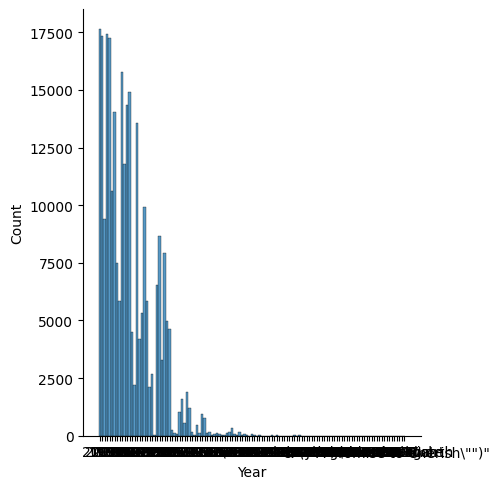

In [21]:
# Analyze distribution of Year column
sns.displot(df["Year"])
plt.show()

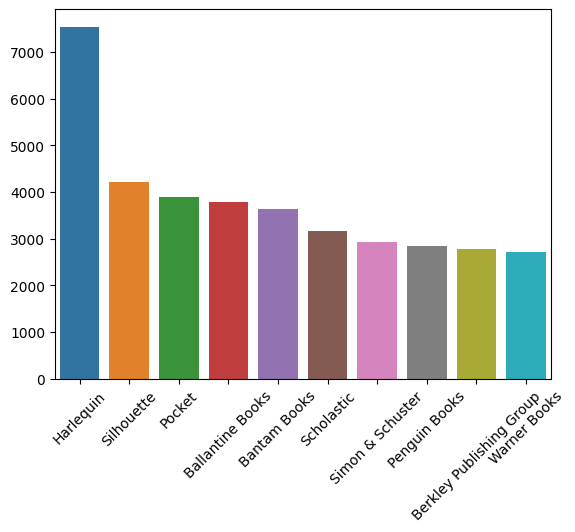

In [22]:
# Analyze distribution of Publisher column
top_publishers = df["Publisher"].value_counts().nlargest(10)
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.xticks(rotation=45)
plt.show()

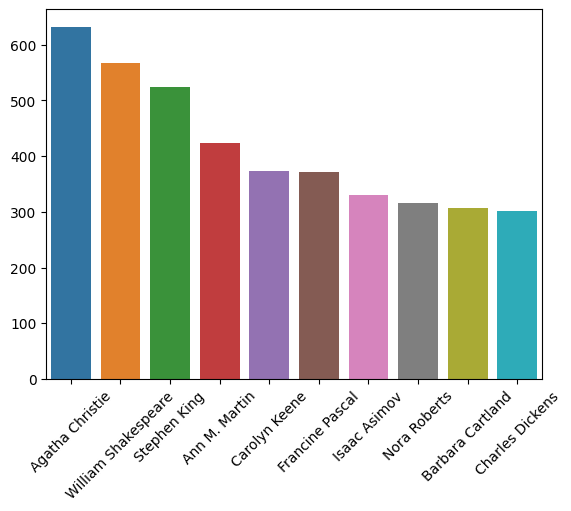

In [23]:
# Analyze distribution of Author column
top_authors = df["Author"].value_counts().nlargest(10)
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.xticks(rotation=45)
plt.show()

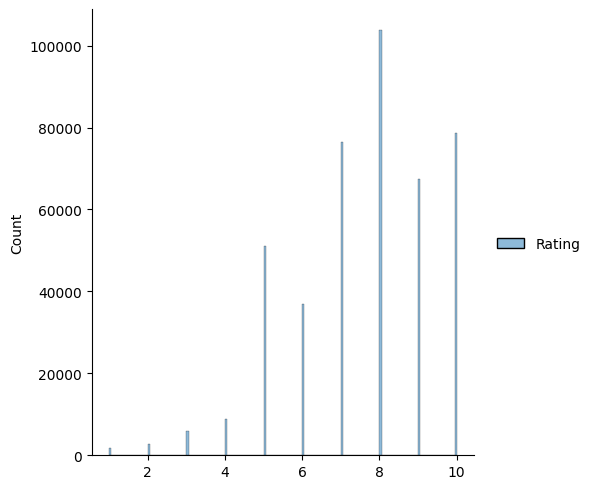

In [24]:
# Analyze distribution of Rating column
sns.displot(df2[df2["Rating"] != 0])
plt.show()

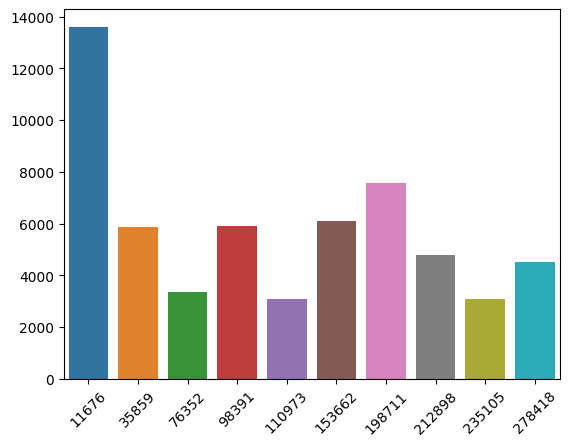

In [25]:
# Analyze distribution of UserID column
top_users = df3["User-ID"].value_counts().nlargest(10)
sns.barplot(x=top_users.index, y=top_users.values)
plt.xticks(rotation=45)
plt.show()

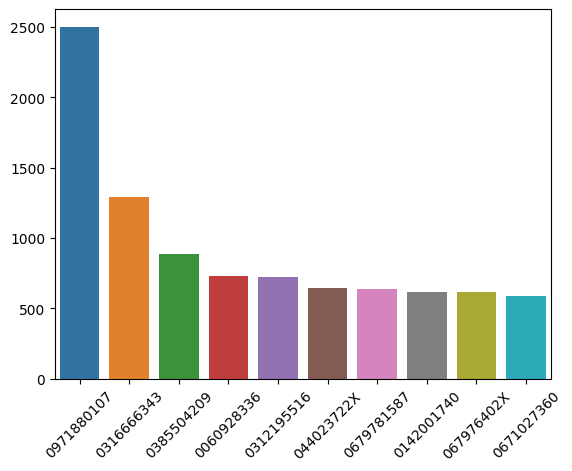

In [26]:
# Analyze distribution of ISBN column
top_books = df3["ISBN"].value_counts().nlargest(10)
sns.barplot(x= top_books.index, y=top_books.values)
plt.xticks(rotation=45)
plt.show()